# <div style="text-align: center"> Convex optimization for machine learning: Part I</div>
#### <div style="text-align: right"> Prof. Changho Suh, TA Gyeongjo Hwang, Doyeon Kim</div>

# 1. Numpy

* **Num**erical **Py**thon의 약자
* 파이썬으로 머신러닝을 한다면 필수적인 라이브러리
* 수치데이터를 다루는데 효율적이고 높은 성능을 제공함
* 스칼라 연산과 비슷한 속도로 연산을 수행함
* 배열을 요소별로 조작하지 않아도 요소별 연산(Element-wise operation)이 가능 - 브로드캐스팅(Broadcasting)
* ndarray type (n - dimensional array object, 다차원 배열 객체)
* 모든 요소가 동일한 datatype 

Reference: 

http://aikorea.org/cs231n/python-numpy-tutorial/

https://nbviewer.jupyter.org/gist/FinanceData/274d1a051b8ef10379b35b3fa72dd931

## Numpy 임포트

In [2]:
import numpy as np

## ndarray 생성

In [3]:
# 리스트로 부터 1차원 배열 생성

ar = np.array([10, 20, 30])

print(ar)
print(type(ar))
print(ar.dtype)
print('Dimension of ar : ', ar.ndim)
print('Shape of ar : ', ar.shape)

[10 20 30]
<class 'numpy.ndarray'>
int64
Dimension of ar :  1
Shape of ar :  (3,)


In [4]:
# 리스트로 부터 2차원 배열 생성

ar = np.array([[10, 20, 30], [60, 70, 80]], dtype=np.float64)

print(ar)
print(type(ar))
print(ar.dtype)
print('Dimension of ar : ', ar.ndim)
print('Shape of ar : ', ar.shape)

[[10. 20. 30.]
 [60. 70. 80.]]
<class 'numpy.ndarray'>
float64
Dimension of ar :  2
Shape of ar :  (2, 3)


In [5]:
# 리스트가 아니더라도 Numpy는 배열을 만들기 위한 다양한 함수를 제공

a = np.zeros((2, 2)) # 모든 값이 0인 shape이 (2, 2)인 배열 생성
print(a)
print('~'*30)

b = np.ones((1, 2)) # 모든 값이 1인 배열 생성
print(b)
print('~'*30)

c = np.full((2, 2), 7) # 모든 값이 특정 상수인 배열 생성
print(c)
print('~'*30)

d = np.eye(2) # 2x2 단위행렬 생성
print(d)
print('~'*30)

e = np.random.random((2, 2)) # 임의의 값으로 채워진 배열 생성
print(e)

[[0. 0.]
 [0. 0.]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[1. 1.]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[7 7]
 [7 7]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[1. 0.]
 [0. 1.]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[0.85940537 0.91282507]
 [0.80625115 0.81057774]]


## 다양한 생성방법
 - np.arange() 메소드로 생성
 - np.asarray() - 기존의 array로 부터 ndarray를 생성

In [6]:
# 0 ... n-1
ar = np.arange(10)
print(ar)
print('~'*40)

# [start], (end), step
ar = np.arange(1, 9, 2)
print(ar)
print('~'*40)

# [start], [end], number of points
ar = np.linspace(0, 10, 20)
print(ar)
print('~'*40)

# [start], [end], number of points
ar = np.linspace(0, 10, 20, endpoint=False)
print(ar)

[0 1 2 3 4 5 6 7 8 9]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[1 3 5 7]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]


In [7]:
a = np.arange(10)
print(a)
print('~'*30)

# 객체를 복사하지 않고 서로 공유한다.
# b를 바꾸면 a에서도 바뀜
b = np.asarray(a)
b[5] = 0
print('a:', a)
print('b:', b)

[0 1 2 3 4 5 6 7 8 9]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
a: [0 1 2 3 4 0 6 7 8 9]
b: [0 1 2 3 4 0 6 7 8 9]


## ndarray.reshape()
 - array의 shape을 바꿔주는 메소드

In [8]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
ar = np.arange(1, 10).reshape(3, 3)
print(ar)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


## 기본적인 Numpy 연산
* 벡터 및 행렬연산
* 기본적인 연산은 배열의 각 요소별로 동작하거나 Numpy내장 함수를 통해 동작함
* 브로드캐스팅(Broadcasting)

In [10]:
x = np.array([[1, 2], [3, 4]], dtype=np.float64)
y = np.array([[5, 6], [7, 8]], dtype=np.float64)

# 요소별 합
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [11]:
# 요소별 차
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [12]:
# 요소별 곱
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [13]:
# 요소별 나눗셈
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [14]:
# 요소별 제곱근
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


In [15]:
# 요소별 거듭제곱
print(x ** 3)
print(np.power(x, 3))

[[ 1.  8.]
 [27. 64.]]
[[ 1.  8.]
 [27. 64.]]


### **벡터의 내적 및 행렬 곱**
 - 주로 벡터의 내적은 **np.dot()** 혹은 **ndarray.dot()**
 - 행렬의 곱은 **np.matmul()** 혹은 **@** 사용 (np.dot()써도 상관없음)

In [16]:
# 벡터의 내적은 np.dot 혹은 ndarray.dot 함수를 사용
v = np.array([9, 10])
w = np.array([11, 12])

print(np.dot(v, w))
print(v.dot(w))

219
219


In [17]:
# 행렬의 곱은 np.matmul() 혹은 @ 사용
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])

print(x@y)
print(np.matmul(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [18]:
# np.dot()도 상관없음
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [19]:
# 전치(Transpose)
print('x:')
print(x)
print('Transpose of x')
print(x.T)
print('~'*20)

# 단, 벡터를 전치할 경우 아무일도 일어나지 않음
print('v:')
print(v)
print('Transpose of v:')
print(v.T)

x:
[[1 2]
 [3 4]]
Transpose of x
[[1 3]
 [2 4]]
~~~~~~~~~~~~~~~~~~~~
v:
[ 9 10]
Transpose of v:
[ 9 10]


## Broadcasting
* Numpy에서 shape이 다른 배열 간에도 산술 연산을 가능하게 하는 메커니즘
* Numpy의 모든 오소별 연산은 브로드캐스팅을 지원한다.

<img src="./figures/slicing3.png" width="600" height="700" align="left"/>

In [20]:
x = np.array([[0, 1, 2], 
              [10, 11, 12], 
              [20, 21, 22], 
              [30, 31, 32]])
y = np.array([0, 1, 2])

# 벡터 y를 행렬 x의 각 행에 더하고 싶을 때 브로드캐스팅 활용
print(x + y)

[[ 0  2  4]
 [10 12 14]
 [20 22 24]
 [30 32 34]]


In [21]:
z = np.array([0, 1, 2, 3])
z = z.reshape(4, 1) # 행 벡터에서 열 벡터로 바꾸기

print('x shape: ', x.shape)
print(x)
print('z shape: ', z.shape)
print(z)
print('~'*10)
print('x+z: ')
print(x + z)
print('~'*10)
print('result of x+y shape: ', (x+z).shape)

x shape:  (4, 3)
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]
z shape:  (4, 1)
[[0]
 [1]
 [2]
 [3]]
~~~~~~~~~~
x+z: 
[[ 0  1  2]
 [11 12 13]
 [22 23 24]
 [33 34 35]]
~~~~~~~~~~
result of x+y shape:  (4, 3)


In [22]:
w = np.array([0, 10, 20, 30])
w = w.reshape(4, 1)

print('y shape: ', y.shape)
print(y)
print('w shape: ', w.shape)
print(w)
print('~'*10)
print('y+w: ')
print(y + w)
print('~'*10)
print('result of y+w shape: ', (y+w).shape)

y shape:  (3,)
[0 1 2]
w shape:  (4, 1)
[[ 0]
 [10]
 [20]
 [30]]
~~~~~~~~~~
y+w: 
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]
~~~~~~~~~~
result of y+w shape:  (4, 3)


In [23]:
# Numpy 배열 뿐 아니라 scalar와도 연산가능
print('x: ')
print(x)
print('x+10: ')
print(x + 10)

x: 
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]
x+10: 
[[10 11 12]
 [20 21 22]
 [30 31 32]
 [40 41 42]]


## Indexing & Slicing
* 파이썬 리스트나 튜플과 마찬가지로 인덱싱, 슬라이싱이 가능
* 특정 영역을 지정하거나 잘래냄
* Numpy배열은 다차원인 경우가 많으므로 각 차원별로 어떻게 슬라이싱 할 지 명확히 해야함

In [24]:
# (34 4)의 shape을 가진 array 생성
ar = np.arange(16).reshape(4, 4)

print(ar)
print('~'*20)
print(ar[0])
print('~'*20)
print(ar[1, 1])
print('~'*20)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
~~~~~~~~~~~~~~~~~~~~
[0 1 2 3]
~~~~~~~~~~~~~~~~~~~~
5
~~~~~~~~~~~~~~~~~~~~


---
* ### 슬라이싱 예시
<img src="./figures/slicing2.png" width="500" height="500" align="left"/>

<img src="./figures/slicing.png" width="700" height="500" align="left"/>

In [25]:
# (3, 4)의 shape을 가진 array 생성
a = np.arange(1, 13).reshape(3, 4)
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [26]:
a[0:3:2, 1:4:2]

array([[ 2,  4],
       [10, 12]])

* **인덱싱 & 슬라이싱된 배열을 수정하면 원본 배열 역시 수정됨**

In [27]:
a[0:3:2, 1:4:2] = np.arange(11, 15).reshape(2, 2)
a

array([[ 1, 11,  3, 12],
       [ 5,  6,  7,  8],
       [ 9, 13, 11, 14]])

In [28]:
a[1, 2] = 15
a

array([[ 1, 11,  3, 12],
       [ 5,  6, 15,  8],
       [ 9, 13, 11, 14]])

In [29]:
a[:, :2]

array([[ 1, 11],
       [ 5,  6],
       [ 9, 13]])

In [30]:
# -1은 마지막 요소를 가르키며 -2, -3, ..은 뒤에서 두번 째 세번 째 ..  요소 이다.
print(a[1:-1])
print('-'*40)
print(a[:, 1:-1])

[[ 5  6 15  8]]
----------------------------------------
[[11  3]
 [ 6 15]
 [13 11]]


## Dimension을 그대로 유지하는 슬라이싱

In [31]:
print(a[1, :])
print('shape :', a[1,:].shape)
print('dim :', a[1,:].ndim, end=' ')
print(' -> Dimension이 한 단계 낮춰짐')
print(a[1:2, :])  # a[[1], :] 도 가능
print('shape :', a[1:2, :].shape)
print('dim :', a[1:2, :].ndim, end=' ')
print(' -> Dimension 유지')

[ 5  6 15  8]
shape : (4,)
dim : 1  -> Dimension이 한 단계 낮춰짐
[[ 5  6 15  8]]
shape : (1, 4)
dim : 2  -> Dimension 유지


In [32]:
# Column slicing도 마찬가지
print(a[:, 1])
print('shape :', a[:, 1].shape)
print('dim :', a[:, 1].ndim, end=' ')
print(' -> Dimension이 한 단계 낮춰짐')
print(a[:, 1:2])  # a[:, [1]] 도 가능
print('shape :', a[:, 1:2].shape)
print('dim :', a[:, 1:2].ndim, end=' ')
print(' -> Dimension 유지')

[11  6 13]
shape : (3,)
dim : 1  -> Dimension이 한 단계 낮춰짐
[[11]
 [ 6]
 [13]]
shape : (3, 1)
dim : 2  -> Dimension 유지


## 정수배열 인덱싱

In [33]:
a = np.arange(1, 13).reshape(4, 3)
a

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [34]:
idx = np.array([0, 1, 0, 2])
a[idx]

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [7, 8, 9]])

In [35]:
# b에 저장된 인덱스를 이용해 각 행에서 하나의 요소를 선택
a[np.arange(4), idx]

array([ 1,  5,  7, 12])

In [36]:
# b에 저장된 인덱스를 이용해 각 행에서 하나의 요소를 변경
a[np.arange(4), idx] += 10
a

array([[11,  2,  3],
       [ 4, 15,  6],
       [17,  8,  9],
       [10, 11, 22]])

## Boolean 배열 인덱싱(Masking)

In [37]:
a = np.arange(1, 10).reshape(3, 3)
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [38]:
# 요소별로 논리 연산이 가능
# 논리 연산결과에 따라 요소별로 True, False 결과를 반환
# Ex) 요소가 짝수인지 아닌지 말해줌
a % 2 == 0

array([[False,  True, False],
       [ True, False,  True],
       [False,  True, False]])

In [39]:
# 불리언 배열 인덱싱을 통해 bool_idx에서
# 참 값을 가지는 요소로 구성되는
# rank 1인 배열을 구성할 수 있음
a[a%2==0]

array([2, 4, 6, 8])

## 데이터 타입 바꾸기 (ndarray.astype method)

In [40]:
print(a.dtype)
print(a.astype(np.float).dtype)

int64
float64


# 2. Matplotlib 기초


* Reference

https://matplotlib.org/
 
https://nbviewer.jupyter.org/gist/FinanceData/3ae09e20d1431f5e417e84f89ae77e9b

* ## Plot

In [42]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

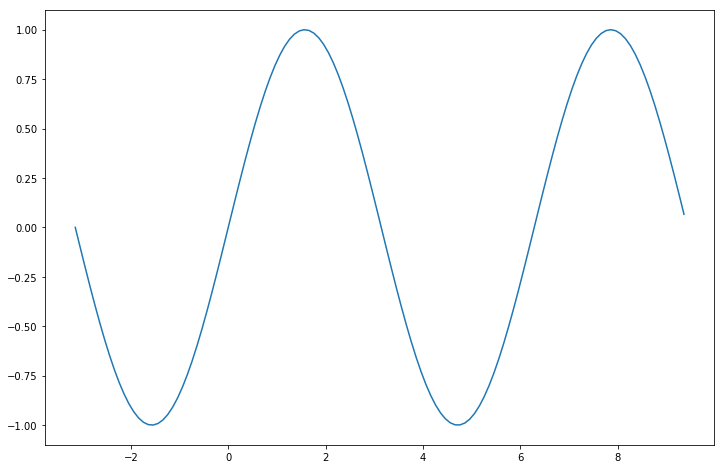

In [43]:
# 사인과 코사인 곡선의 x,y 좌표를 계산
x = np.arange(- np.pi, 3 * np.pi, 0.1)
y = np.sin(x)

# matplotlib를 이용해 점들을 그리기
plt.plot(x, y)
plt.show()

---
## 다양한 plot기능
- 선 색깔 바꾸기
- 범례 넣기
- x축 y축 레이블 넣기
- 글자크기 바꾸기
- ticks 바꾸기
- grid켜기, x축 y축 그리기
- x값, y값 범위 지정하기

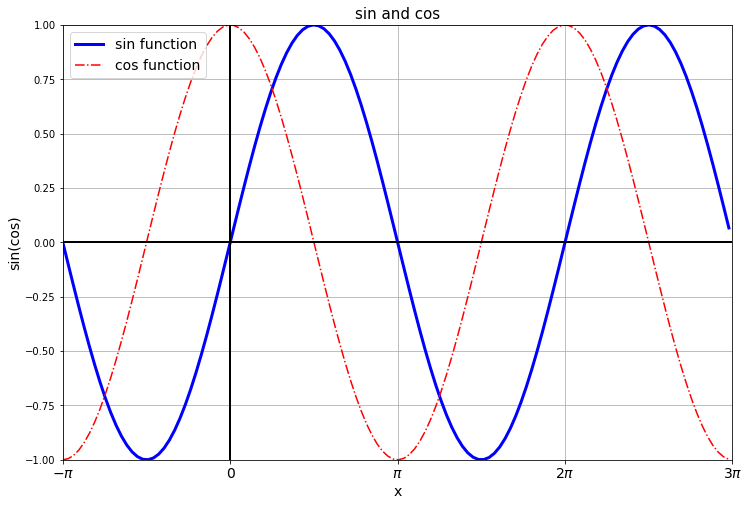

In [44]:
plt.plot(x, y, color='b', label='sin function', linewidth=3)
plt.plot(x, np.cos(x), color='r', label='cos function', linestyle='-.')
plt.legend(fontsize=14)
plt.title('sin and cos', fontsize=15)
plt.axvline(x=0, color='black', linewidth=2)
plt.axhline(y=0, color='black', linewidth=2)
plt.xlabel('x', fontsize=14)
plt.ylabel('sin(cos)', fontsize=14)
plt.ylim(top=1, bottom=-1)
plt.xlim(right=x[-1], left=x[0])
plt.xticks((-np.pi, 0, np.pi, 2*np.pi, 3*np.pi), ('$-\pi$', '0', '$\pi$', '$2\pi$', '$3\pi$'), fontsize=14)
plt.grid(True)
plt.show()

## 선 스타일에 따른 기호

<img src="./figures/line_char.png" width="500" height="500" align="left"/>
<img src="./figures/color.png" width="500" height="500" align="left"/>

## Subplots
 - 여러개의 그래프를 동시에 plot

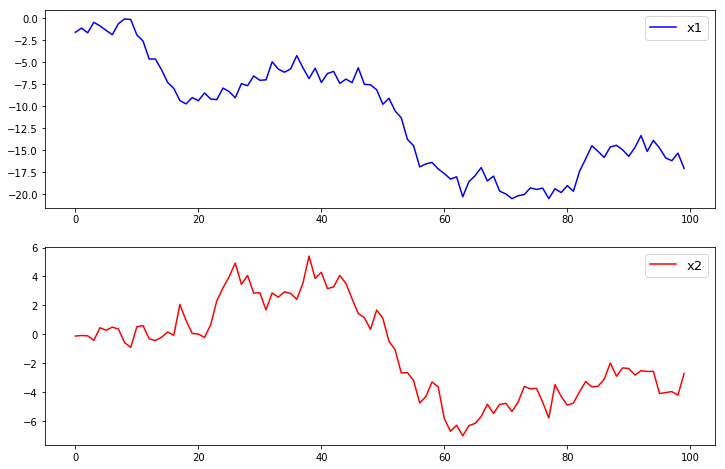

In [45]:
x1 = np.random.randn(100).cumsum()
x2 = np.random.randn(100).cumsum()
plt.subplot(2, 1, 1)
plt.plot(x1, color='b', label='x1')
plt.legend(fontsize=13)
plt.subplot(2, 1, 2)
plt.plot(x2, color='r', label='x2')
plt.legend(fontsize=13)
plt.show()

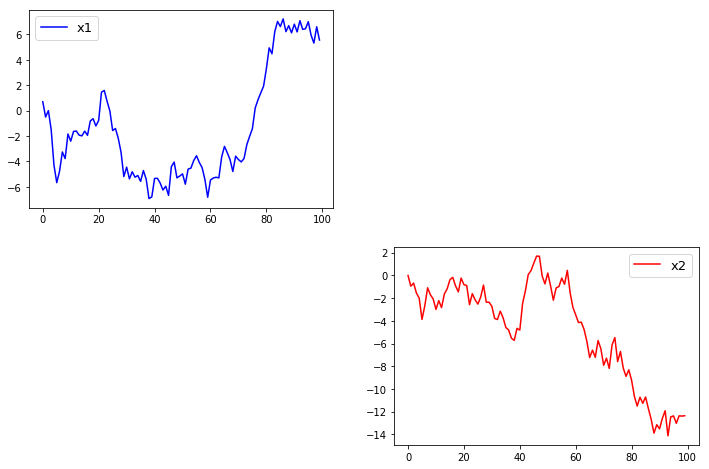

In [46]:
x1 = np.random.randn(100).cumsum()
x2 = np.random.randn(100).cumsum()
plt.subplot(2, 2, 1)
plt.plot(x1, color='b', label='x1')
plt.legend(fontsize=13)
plt.subplot(2, 2, 4)
plt.plot(x2, color='r', label='x2')
plt.legend(fontsize=13)
plt.show()

## 산점도

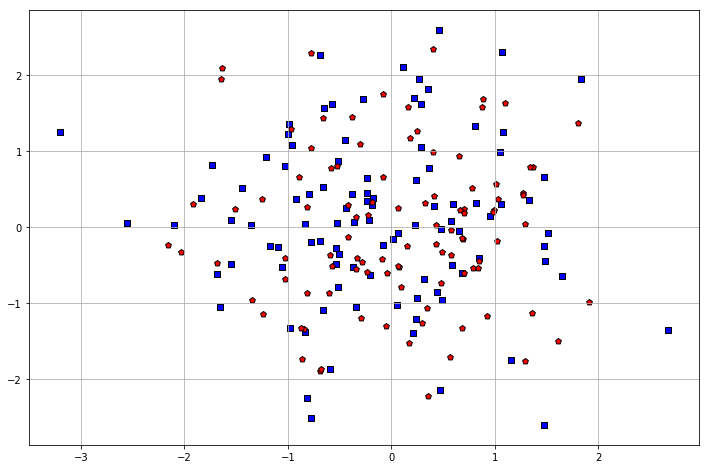

In [47]:
np.random.seed(2019)
x1 = np.random.randn(100)
x2 = np.random.randn(100)
x3 = np.random.randn(100)
x4 = np.random.randn(100)
plt.scatter(x1, x2, color='b', marker='s', edgecolor='k')
plt.scatter(x3, x4, color='r', marker='p', edgecolor='k')
plt.grid(True)

## 산점도 스타일에 따른 marker 기호 Table

<img src="./figures/scatter.png" width="700" height="500" align="left"/>